In [1]:
import numpy as np
import pandas as pd
import pyodbc as pyodbc
import os
import re
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.cluster import AgglomerativeClustering # hierarchial clustering algorithm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import itertools
from sklearn import metrics
from sklearn.impute import SimpleImputer
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('SegmentationData.csv')

In [3]:
data = data.drop(['Segmentation','Var_1'],axis=1)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [5]:
data.isnull().sum().reset_index()

,index,0
0,ID,0
1,Gender,0
2,Ever_Married,140
3,Age,0
4,Graduated,78
5,Profession,124
6,Work_Experience,829
7,Spending_Score,0
8,Family_Size,335


# Exploratory Data Analysis

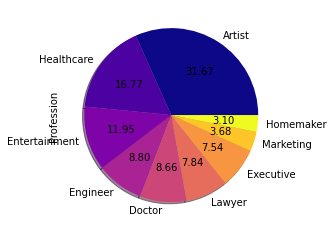

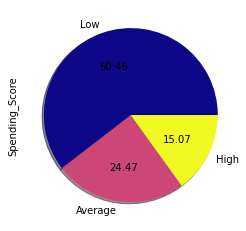

In [6]:
col = data.columns.to_list()
for i in range(5,(len(col)-1)):
    if is_string_dtype(data[col[i]]):
        data[col[i]].value_counts().plot.pie(autopct="%.2f",shadow = True,cmap = 'plasma')
        plt.show()        

In [7]:
def dist_variables(df,col):
    
    for i in range(1,(len(col))):
        if is_string_dtype(df[col[i]]):
            print(df[col[i]].value_counts())
dist_variables(data,col)

Male      4417
Female    3651
Name: Gender, dtype: int64
Yes    4643
No     3285
Name: Ever_Married, dtype: int64
Yes    4968
No     3022
Name: Graduated, dtype: int64
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


<AxesSubplot:>

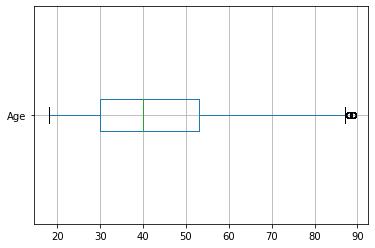

In [42]:
data.boxplot(column =  ['Age'], vert=False)

ID


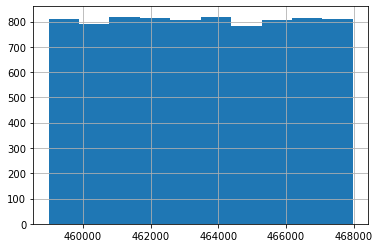

Gender


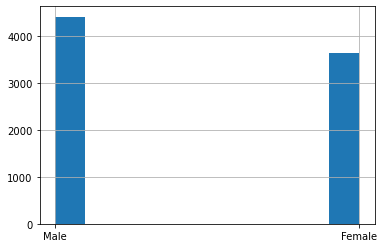

Ever_Married


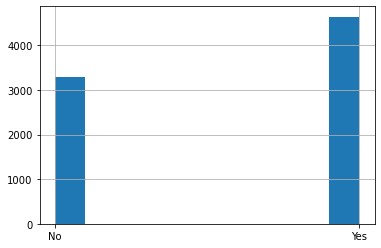

Age


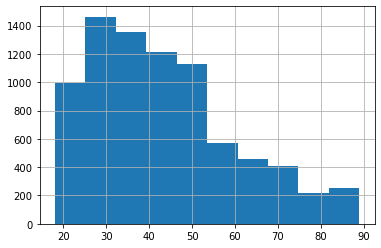

Graduated


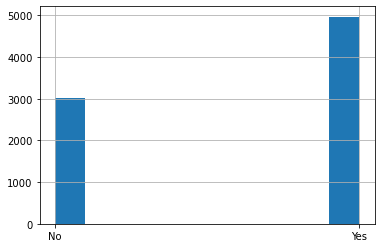

Profession


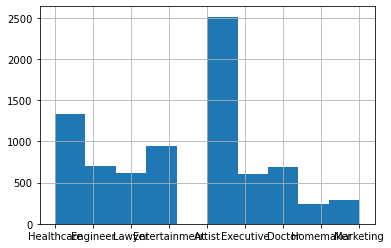

Work_Experience


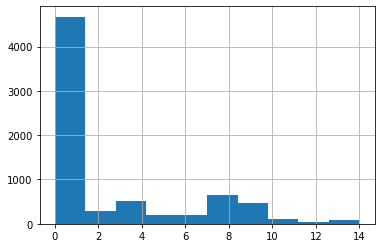

Spending_Score


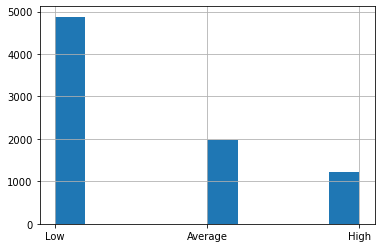

Family_Size


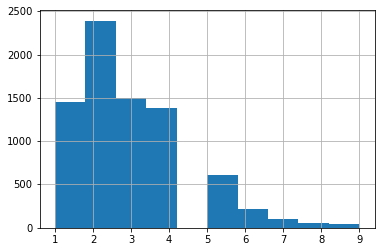

In [43]:
def EDAHistogram(df,lists):
    for i in lists:
        print(i)
        df[i].hist()
        plt.show()
        #plt.figure(figsize=(10,8),edgecolor='blue')
    
EDAHistogram(data,col)

Pearson Correlation for numeric variables

<AxesSubplot:>

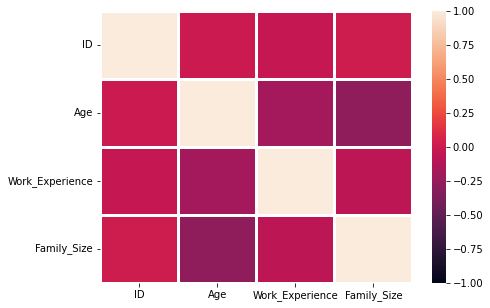

In [44]:
correlation = data.corr(method = 'pearson')
plt.subplots(figsize = (7,5))
sns.heatmap(correlation, vmax= 1.0,vmin = -1.0, linewidths = 2.5)

In [45]:
for i in range(1,(len(col))):
    if is_numeric_dtype(data[col[i]]):
        print(data[col[i]].value_counts())

35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


# Data Cleanning

In [8]:
def Data_Cleaning(df):
    cat_list = []
    num_list = []
    for column in df:
        if is_string_dtype(df[column]):
            cat_list.append(column)
        if is_numeric_dtype(df[column]):
            num_list.append(column)
    # Imputing data with most common class for categorical variables
    clean_data = df.copy()
    clean_data[cat_list] = df[cat_list].apply(lambda x: x.fillna(x.value_counts().index[0]))
    # Imputing data with median value
    clean_data[num_list] = df[num_list].apply(lambda x: x.fillna(x.median()))
    return(clean_data,cat_list,num_list)
clean_data,cat_list,num_list = Data_Cleaning(data)
clean_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0


In [47]:
clean_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [48]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [49]:
#You can use SimpleImputer package for imputing data
# from sklearn.impute import SimpleImputer
# new_data = data.copy()
# # Imputation
# my_imputer = SimpleImputer(strategy = 'median')
# new_data = pd.DataFrame(my_imputer.fit_transform(new_data[['Family_Size','Work_Experience','Age']]))
# new_data.columns = ['Family_Size','Work_Experience','Age']

# Label Encoding

In [9]:
def One_Hot_Encoding(df):
    OHE = OneHotEncoder(handle_unknown = 'error')
    OHC = OHE.fit_transform(df[cat_list]).toarray()
    OHFN = OHE.get_feature_names(cat_list)
    OHEdf = pd.DataFrame(OHC, columns=OHFN).astype(int).reset_index(drop=True)
    df_transformed = pd.concat([df,OHEdf],axis=1).reset_index(drop=True)
    data2 = df_transformed.drop(labels = cat_list, axis=1)
    return(data2)
data2 = One_Hot_Encoding(clean_data)
data2.head()

C:\Users\shiryas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,22,1.0,4.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,462643,38,1.0,3.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,466315,67,1.0,1.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,461735,67,0.0,2.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,462669,40,1.0,6.0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [10]:
#Label Encoding
clean_data_copy = clean_data.copy()
for i in clean_data_copy[cat_list]:
    clean_data_copy[i] = le.fit_transform(clean_data_copy[i])
clean_data_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1,0,22,0,5,1.0,2,4.0
1,462643,0,1,38,1,2,1.0,0,3.0
2,466315,0,1,67,1,2,1.0,2,1.0
3,461735,1,1,67,1,7,0.0,1,2.0
4,462669,0,1,40,1,3,1.0,1,6.0


In [58]:
clean_data_copy.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')

# Pearson Correlation

<AxesSubplot:>

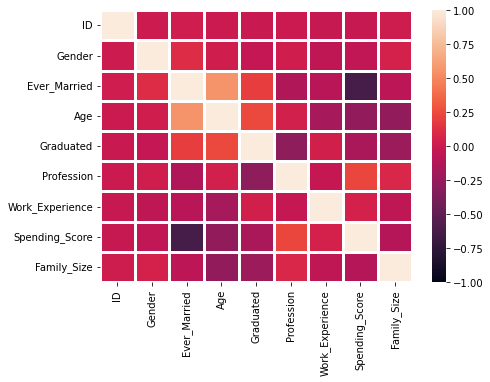

In [52]:
correlation = clean_data_copy.corr(method = 'pearson')
plt.subplots(figsize = (7,5))
sns.heatmap(correlation, vmax= 1.0,vmin = -1.0, linewidths = 2.5)

<AxesSubplot:>

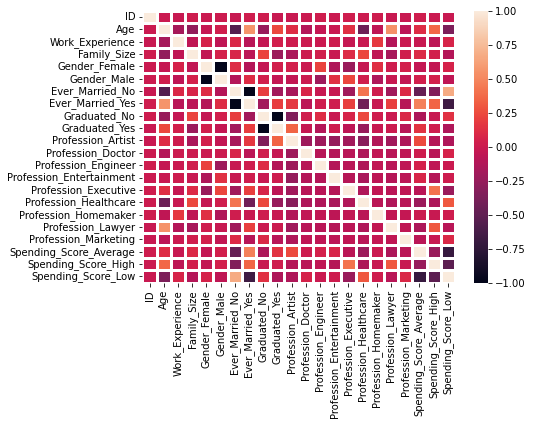

In [57]:
correlation = data2.corr(method = 'pearson')
plt.subplots(figsize = (7,5))
sns.heatmap(correlation, vmax= 1.0,vmin = -1.0, linewidths = 2.5)

# Standardizing Data

In [11]:
def Standardize_Data(df):
    std_df =pd.DataFrame()
    for i in df:
        std_df[i]=(df[i]-df[i].mean())/df[i].std()
    return(std_df)
data_std = Standardize_Data(clean_data_copy)
data_stdOHE = Standardize_Data(data2)
data_std.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-0.258234,0.909108,-1.206579,-1.284544,-1.292110,0.886552,-0.451108,0.754415,0.762651
1,-0.322193,-1.099843,0.828687,-0.327131,0.773832,-0.293892,-0.451108,-1.602913,0.095796
2,1.092628,-1.099843,0.828687,1.408181,0.773832,-0.293892,-0.451108,0.754415,-1.237913
3,-0.672046,0.909108,0.828687,1.408181,0.773832,1.673514,-0.757363,-0.424249,-0.571059
4,-0.312176,-1.099843,0.828687,-0.207454,0.773832,0.099590,-0.451108,-0.424249,2.096361


# K-means Clustering

In [12]:
def ClusteringFun(std,df,clusters,MlC):

    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(std)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    #model
    model = KMeans(init = 'k-means++', n_clusters = clusters, n_init = 20, 
                   ## number of times the model will be run with different starting centroids
                   random_state=5)
    model.fit(std)
    #Profiling K-means clustering with ML
    labels = model.labels_
    MlC['clusters']=labels

    #Profiling K-means clustering with ML
    df['Clusters'] = MlC['clusters']

    # silhouette score is used to calculate goodness of cluster. CLoser the score to 1 considered as good clustering model
    x = silhouette_score(std, labels, metric='euclidean')
    print("silhouette score: ", x)
    return(df, labels,model)

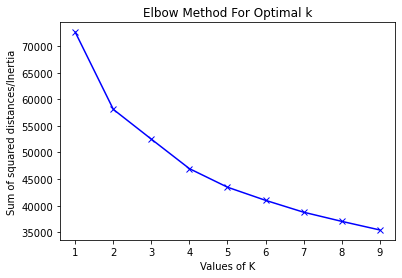

silhouette score:  0.1834843368261574


In [13]:
data3,labels,model = ClusteringFun(data_std,data,4,clean_data)

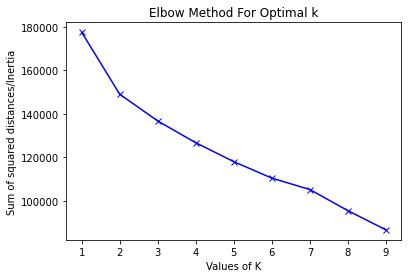

silhouette score:  0.15481401263501823


In [14]:
data33,labels,model = ClusteringFun(data_stdOHE,data,4,data2)

# Build a persona

In [15]:
data3

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Clusters
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,3
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,3
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,1
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,1
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,1


In [16]:
cluster1 = data3[data3['Clusters'] ==0]
dist_variables(cluster1,col)

Male      1139
Female     824
Name: Gender, dtype: int64
Yes    1927
Name: Ever_Married, dtype: int64
Yes    1446
No      496
Name: Graduated, dtype: int64
Artist           1011
Entertainment     319
Engineer          221
Doctor            177
Executive          75
Homemaker          60
Healthcare         42
Marketing          17
Lawyer              7
Name: Profession, dtype: int64
Average    1963
Name: Spending_Score, dtype: int64


In [17]:
cluster2 = data3[data3['Clusters'] ==1]
dist_variables(cluster2,col)

Male      1058
Female     978
Name: Gender, dtype: int64
No     1943
Yes      65
Name: Ever_Married, dtype: int64
No     1656
Yes     367
Name: Graduated, dtype: int64
Healthcare       1174
Doctor            202
Engineer          157
Marketing         146
Entertainment     146
Artist             72
Homemaker          68
Executive          29
Lawyer              9
Name: Profession, dtype: int64
Low     2034
High       2
Name: Spending_Score, dtype: int64


In [18]:
cluster3 = data3[data3['Clusters'] ==2]

dist_variables(cluster3,col)

Female    1270
Male      1249
Name: Gender, dtype: int64
No     1337
Yes    1149
Name: Ever_Married, dtype: int64
Yes    2200
No      293
Name: Graduated, dtype: int64
Artist           1191
Entertainment     438
Doctor            278
Engineer          261
Marketing          96
Homemaker          92
Healthcare         73
Lawyer             28
Executive          16
Name: Profession, dtype: int64
Low    2519
Name: Spending_Score, dtype: int64


In [20]:
cluster4 = data3[data3['Clusters'] ==3]

dist_variables(cluster4,col)

Male      971
Female    579
Name: Gender, dtype: int64
Yes    1502
No        5
Name: Ever_Married, dtype: int64
Yes    955
No     577
Name: Graduated, dtype: int64
Lawyer           579
Executive        479
Artist           242
Engineer          60
Entertainment     46
Healthcare        43
Marketing         33
Doctor            31
Homemaker         26
Name: Profession, dtype: int64
High       1214
Low         325
Average      11
Name: Spending_Score, dtype: int64


In [21]:
data3.groupby(['Clusters'])['Age'].describe().reset_index().round(2)

,Clusters,count,mean,std,min,25%,50%,75%,max
0,0,1963.0,46.71,11.13,18.0,38.0,46.0,55.0,89.0
1,1,2036.0,27.51,7.63,18.0,22.0,27.0,31.0,82.0
2,2,2519.0,43.07,12.29,18.0,35.0,41.0,50.0,89.0
3,3,1550.0,60.96,17.91,18.0,46.0,63.0,76.0,89.0


<AxesSubplot:xlabel='Clusters', ylabel='Age'>

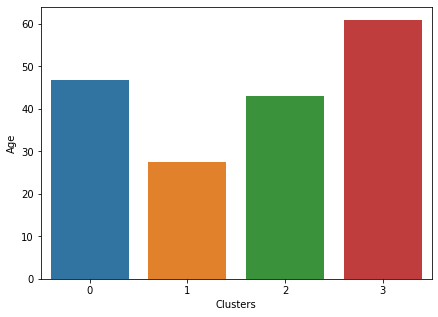

In [22]:
plt.figure(figsize=(7, 5))
data_mean = data3.groupby(['Clusters'], as_index=False).mean().round(2)
sns.barplot(x='Clusters',y='Age',data=data_mean)

In [23]:
data3.groupby(['Clusters'])['Work_Experience'].describe().reset_index().round(2)

,Clusters,count,mean,std,min,25%,50%,75%,max
0,0,1755.0,2.52,3.24,0.0,0.0,1.0,4.0,14.0
1,1,1800.0,2.62,3.41,0.0,0.0,1.0,4.0,14.0
2,2,2326.0,3.16,3.71,0.0,0.0,1.0,6.0,14.0
3,3,1358.0,1.93,2.88,0.0,0.0,1.0,2.0,14.0


<AxesSubplot:xlabel='Clusters', ylabel='Work_Experience'>

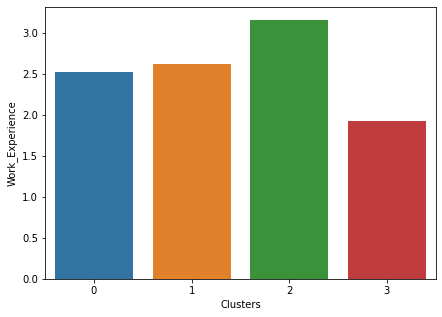

In [25]:
plt.figure(figsize=(7, 5))
data_mean = data3.groupby(['Clusters'], as_index=False).mean().round(2)
sns.barplot(x='Clusters',y='Work_Experience',data=data_mean)

In [26]:
data3.groupby(['Clusters'])['Family_Size'].describe().reset_index().round(2)

,Clusters,count,mean,std,min,25%,50%,75%,max
0,0,1932.0,3.11,1.24,1.0,2.0,3.0,4.0,9.0
1,1,1913.0,3.67,1.68,1.0,3.0,4.0,5.0,9.0
2,2,2395.0,2.04,1.25,1.0,1.0,2.0,3.0,9.0
3,3,1493.0,2.75,1.43,1.0,2.0,2.0,4.0,9.0


<AxesSubplot:xlabel='Clusters', ylabel='Family_Size'>

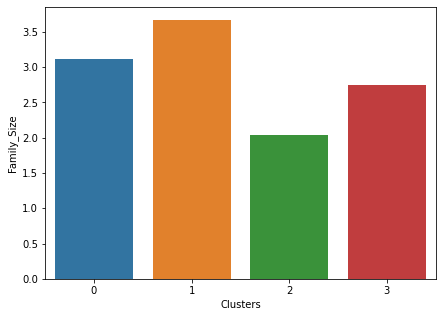

In [27]:
plt.figure(figsize=(7, 5))
data_mean = data3.groupby(['Clusters'], as_index=False).mean().round(2)
sns.barplot(x='Clusters',y='Family_Size',data=data_mean)